## Assignment 2 Solutions

In [6]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pandas as pd
import seaborn as sns
%pylab inline
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


When creating plots, there are several available styles that you can choose from if you wish to customize how your charts look. Below is a list of what comes built into matplotlib

### 1  IRIS Dataset

In [7]:
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
colNames = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name']
data = pd.read_csv(fileURL, names=colNames, header=None)

#### 1.1  Summary Statistics

In [8]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
def get_statistics(data):
    # Compute summary statistics and transpose the table
    data_stats = data.describe().transpose()

    # Add a column with variance
    data_stats['variance'] = data.var()
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    newdf = data.select_dtypes(include=numerics)
    data_stats['range'] = [newdf[col].ptp() for col in list(newdf.columns)]

    return data_stats

In [10]:
get_statistics(data)

,count,mean,std,min,25%,50%,75%,max,variance,range
Sepal Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,0.685694,3.6
Sepal Width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4,0.188004,2.4
Petal Length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9,3.113179,5.9
Petal Width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5,0.582414,2.4


#### 1.2 Data Visualization

#### Histograms

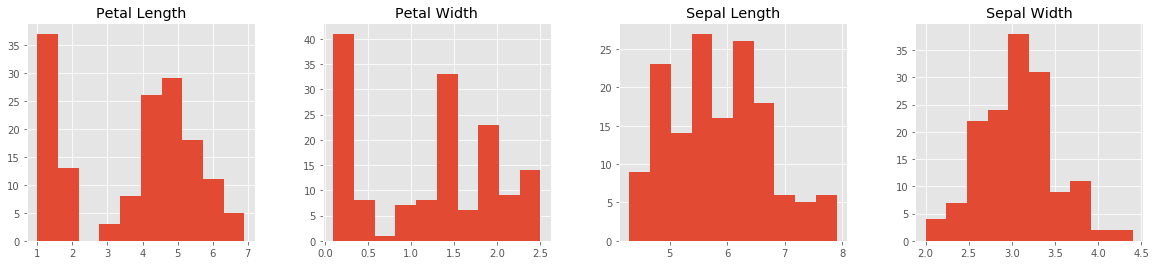

In [11]:
fig, ax = plt.subplots(figsize=(20,4), nrows=1, ncols=4)
hist1 = data.iloc[:,0:4].hist(figsize=(20,6), ax=ax)

#### Boxplots

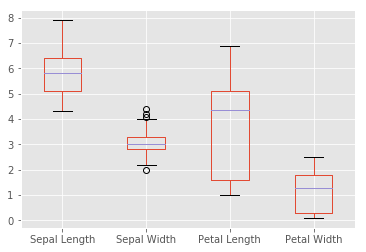

In [12]:
bp = data.boxplot(grid=True, return_type='axes')

#### Pairwise Plot

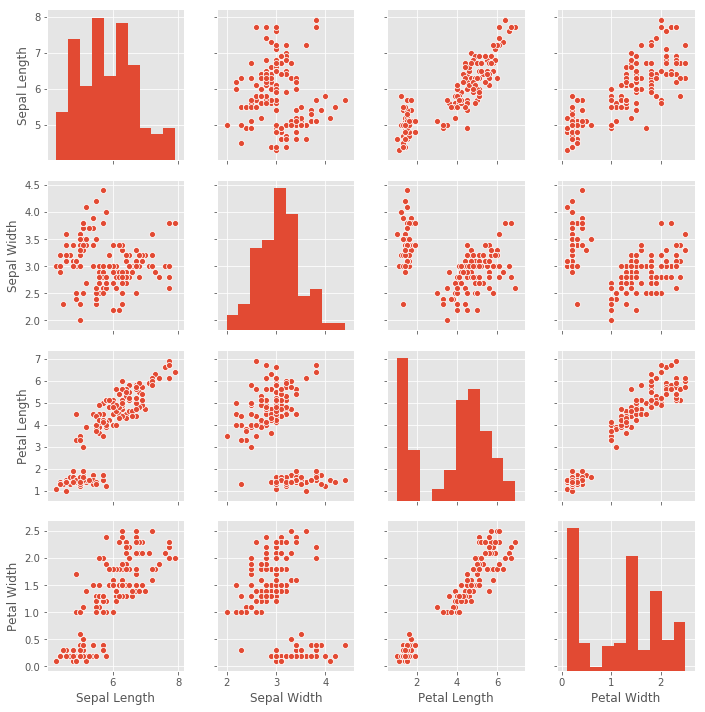

In [13]:
g = sns.pairplot(data)

#### Class-wise Visualization

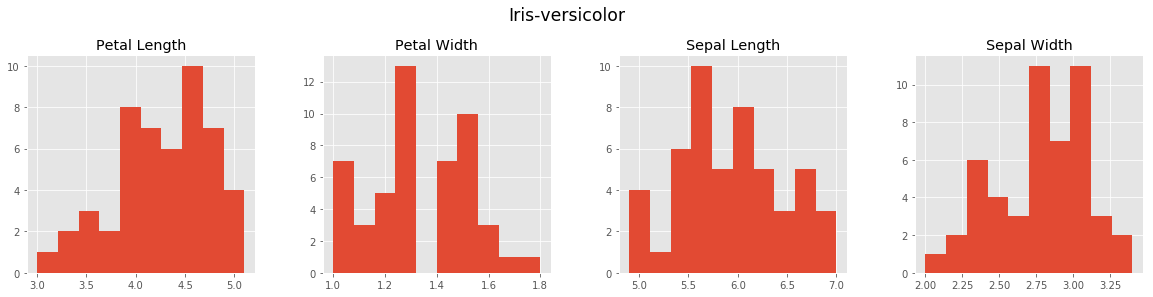

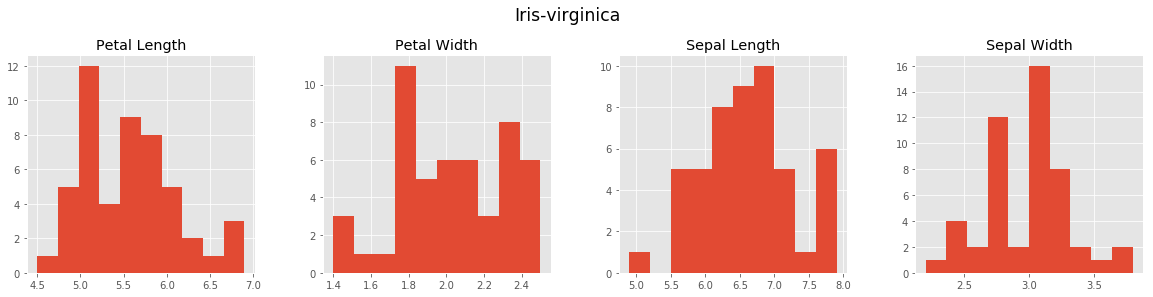

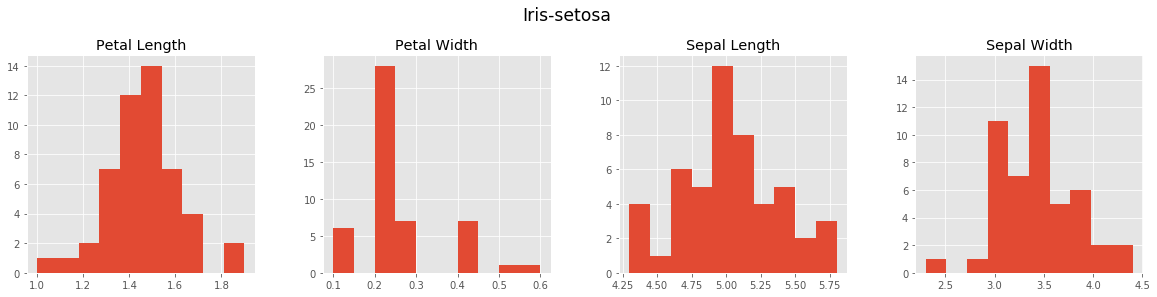

In [14]:
for name in set(list(data['Name'])):
    class_data = data[data['Name']==name]
    fig, ax = plt.subplots(figsize=(20,4), nrows=1, ncols=4)
    hist1 = class_data.iloc[:,0:4].hist(ax=ax)
    fig.suptitle(name, x=0.5, y=1.05, ha='center', fontsize='xx-large')
    plt.show()

### 1.3 Conceptual Questions

1. There are total 5 features. Petal Lenght, Petal Width, Sepal Length, Sepal Width are numerical and continuos. The class name is nominal and categorical. 

2. The histograms for petal length and petal width display multiple points of high frequency, wheras the histograms for sepal length and sepal width display distributions that reach their highest frequency at a particular point. More generally, the petal length and petal width histograms display bimodal distributions, whereas the sepal length and sepal width histograms display normal distributions. Given the petal length histogram, a value between 2.5-3.0 would be effective at segmented the distribution of petal lengths, as the histogram displays a low frequency within this range.

3. Based upon the boxplots generated for the Iris dataset, sepal length and petal width have significantly different medians, as there is no overlap between the ranges of these two boxplots. Strictly speaking, several other pairs of varibles can be considered to have signficantly different medians; sepal length and petal width simply have the greatest difference. Based solely upon the box plots, petal length appears to explain the greatest amount of the data, as it displays the greatest range -- the greatest variability -- among the features.

4. The features are correlated if it can be seen from the scatter plot that changing one feature changes another feature positively or negatively. From the pairplots of the features, we can see some of the pairs are positively correlated. Three such pairs are: 
    - Petal Width - Petal Length
    - Sepal Length - Petal Length
    - Sepal Length - Petal Width

5. The histograms of the Petal Length and Petal Width are significantly different. As mentioned in question 2, the histograms of these two features looks like bimodal distribution for the whole dataset. But for the classwise plot, the histograms looks like normal distribution. The reason behind this is different classes have different ranges of values for these two features. But for each class, the range of values have normal distribution. 

### 2 Air Quality Dataset

In [15]:
data2 = pd.read_excel('AirQualityUCI.xlsx')

In [16]:
data2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


#### 2.1 Summary Statistics

In [17]:
get_statistics(data2)

,count,mean,std,min,25%,50%,75%,max,variance,range
CO(GT),9357.0,-34.207524,77.657170,-200.0,0.600000,1.500000,2.600000,11.900000,6030.636106,211.900000
PT08.S1(CO),9357.0,1048.869652,329.817015,-200.0,921.000000,1052.500000,1221.250000,2039.750000,108779.263095,2239.750000
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.000000,-200.000000,-200.000000,1189.000000,19540.990493,1389.000000
C6H6(GT),9357.0,1.865576,41.380154,-200.0,4.004958,7.886653,13.636091,63.741476,1712.317143,263.741476
PT08.S2(NMHC),9357.0,894.475963,342.315902,-200.0,711.000000,894.500000,1104.750000,2214.000000,117180.176653,2414.000000
NOx(GT),9357.0,168.604200,257.424561,-200.0,50.000000,141.000000,284.200000,1479.000000,66267.404793,1679.000000
PT08.S3(NOx),9357.0,794.872333,321.977031,-200.0,637.000000,794.250000,960.250000,2682.750000,103669.208719,2882.750000
NO2(GT),9357.0,58.135898,126.931428,-200.0,53.000000,96.000000,133.000000,339.700000,16111.587462,539.700000
PT08.S4(NO2),9357.0,1391.363266,467.192382,-200.0,1184.750000,1445.500000,1662.000000,2775.000000,218268.721729,2975.000000
PT08.S5(O3),9357.0,974.951534,456.922728,-200.0,699.750000,942.000000,1255.250000,2522.750000,208778.379165,2722.750000


#### 2.2 Data Visualization

#### Histograms

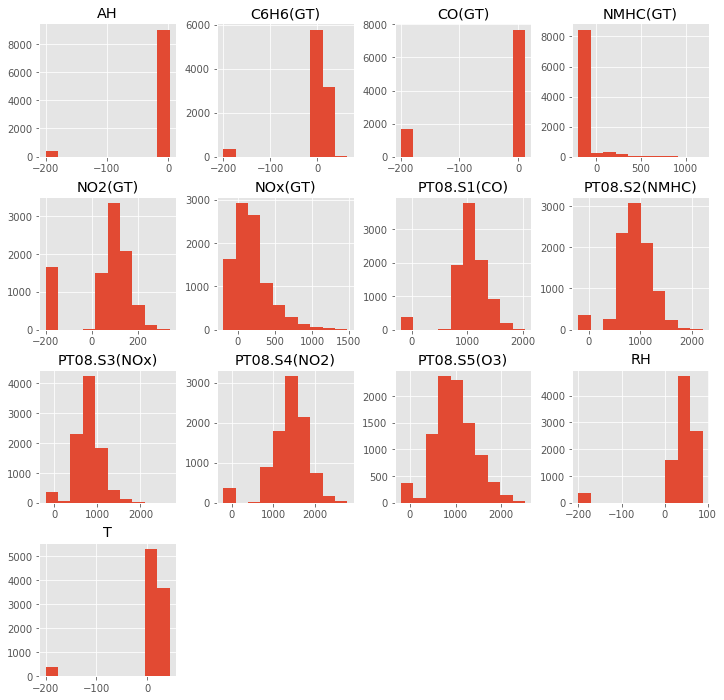

In [18]:
data2_hist = data2.hist(figsize=(12,12))

#### Boxplots

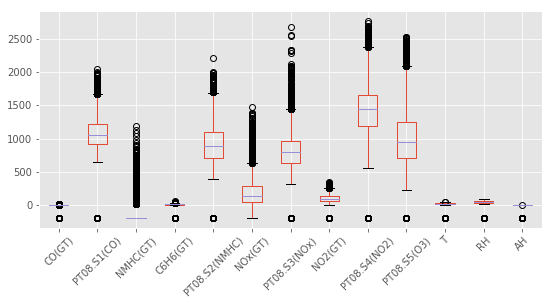

In [19]:
data2_boxplot = data2.iloc[:, 2:].plot.box(rot=45, figsize=(9,4))

#### Boxplots without outliers

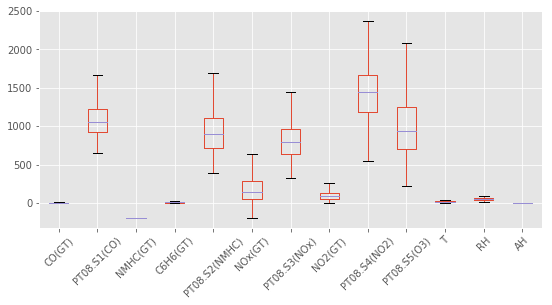

In [20]:
data2_boxplot = data2.iloc[:, 2:].plot.box(rot=45, figsize=(9,4), showfliers=False)

### 2.3 Conceptual Questions

1. From the histograms it can be seen that for many features there are values for -200, but after that there is a large gap. It seems like that these values are invalid. These can be seen as missing values, which are replaced by -200. 

Also the description of the dataset from the website says that the mising values are replaced with -200.

2. For all the features, minimum value is -200 from the summary statistics. This shows the abnormality that all the features have same minimum value, although their range of values are really different. 

3. All the -200 values can be replaced with None, and then we can drop the missing values with the following code. And then we can see the summary statistics, and the minimum values are different now. 

In [21]:
data2 = data2.replace(-200, None)
data2 = data2.dropna()
get_statistics(data2)

,count,mean,std,min,25%,50%,75%,max,variance,range
CO(GT),9357.0,2.082195,1.469801,0.100000,1.000000,1.700000,2.800000,11.900000,2.160316,11.800000
PT08.S1(CO),9357.0,1102.604396,219.599578,647.250000,938.250000,1061.500000,1237.250000,2039.750000,48223.974787,1392.500000
NMHC(GT),9357.0,270.496740,73.306853,7.000000,275.000000,275.000000,275.000000,1189.000000,5373.894736,1182.000000
C6H6(GT),9357.0,10.190299,7.565011,0.149048,4.401596,8.276765,14.019301,63.741476,57.229396,63.592429
PT08.S2(NMHC),9357.0,942.422741,269.583076,383.250000,732.500000,910.500000,1117.250000,2214.000000,72675.035043,1830.750000
NOx(GT),9357.0,240.718147,206.611257,2.000000,97.000000,174.000000,318.000000,1479.000000,42688.211706,1477.000000
PT08.S3(NOx),9357.0,832.618539,255.704654,322.000000,654.500000,806.750000,967.500000,2682.750000,65384.870323,2360.750000
NO2(GT),9357.0,109.401453,47.210774,2.000000,73.000000,102.000000,137.000000,339.700000,2228.857144,337.700000
PT08.S4(NO2),9357.0,1452.890358,347.427351,551.000000,1227.750000,1459.750000,1676.750000,2775.000000,120705.763890,2224.000000
PT08.S5(O3),9357.0,1030.388426,410.906048,221.000000,726.000000,963.750000,1286.500000,2522.750000,168843.780181,2301.750000


4. From the histograms of the dataset after removing the missing values, we see that the shapes of the histograms are changed, and we can see that most of the features follow normal distribution. 

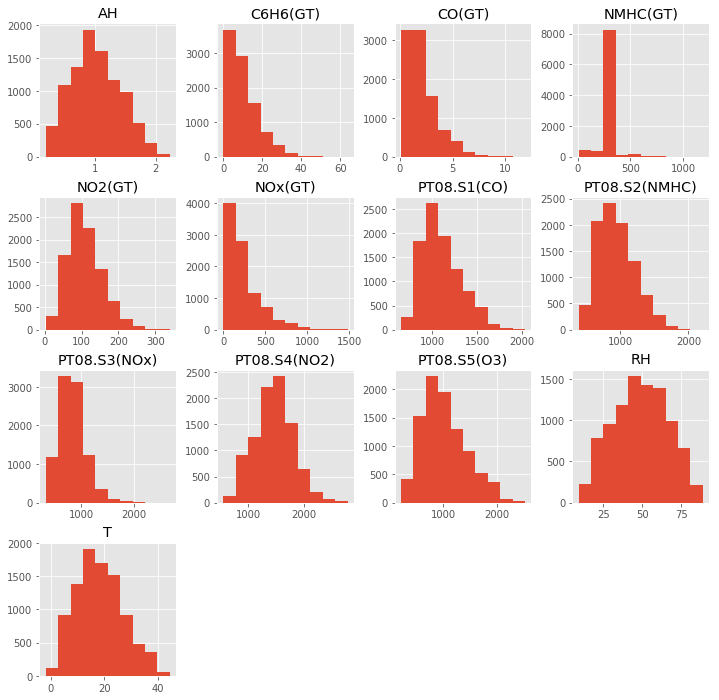

In [22]:
data2_hist = data2.hist(figsize=(12,12))